# Homework 5
Biol 419/519
Winter 2017

Jason Fontana

In [1]:
# preliminaries
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

### 1(a) 

In [2]:
genes = np.load('CancerMicroarray.npy')
cancer_types = np.load('CancerTypes.npy')

In [3]:
genes

array([[ 3.2025,  0.0681,  1.046 , ...,  0.3175,  0.724 ,  0.2044],
       [ 1.6547,  0.071 ,  1.0409, ...,  0.414 ,  1.2708,  0.299 ],
       [ 3.2779,  0.116 ,  0.8926, ...,  0.3227,  1.2142,  0.223 ],
       ..., 
       [ 0.8249,  0.3454,  1.2253, ...,  1.1742,  0.7052,  0.2799],
       [ 0.1181,  0.1068,  0.3881, ...,  0.4537,  0.5848,  0.1444],
       [ 0.7173,  0.1108,  0.6291, ...,  0.4037,  0.6598,  0.148 ]])

In [4]:
genes.shape

(83, 2308)

In [5]:
cancer_types.shape

(83,)

In [6]:
cancer_types

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 1, 4,
       2, 1, 2, 2, 2, 1, 4, 1, 3, 3, 3, 3, 4, 2], dtype=uint8)

### 1(b)

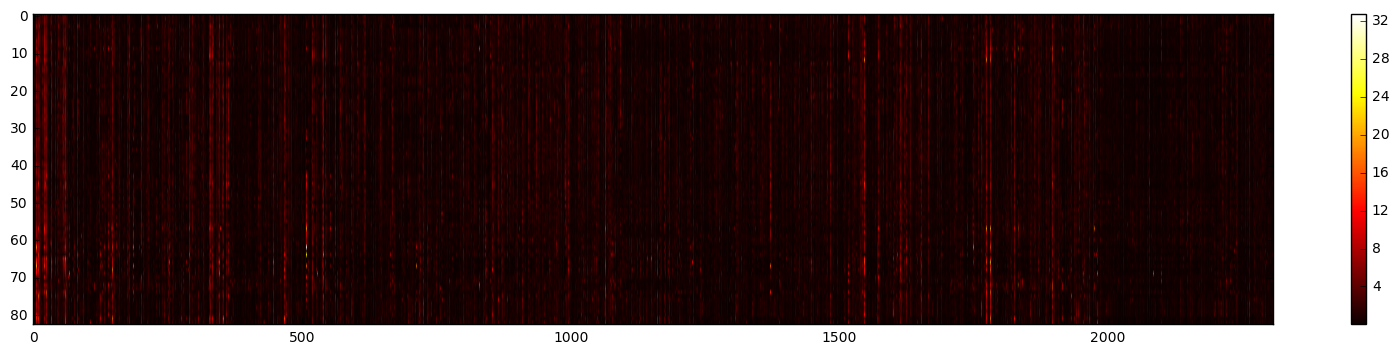

In [7]:
plt.figure(figsize=(20,4))
plt.imshow(genes, cmap="hot", aspect='auto')
plt.colorbar()

# to fix y axis: http://stackoverflow.com/questions/12806481/matplotlib-imshow-stretch-to-fit-width

### 2(a)

In [8]:
import seaborn as sns
from sklearn.decomposition import PCA

In [9]:
import pandas as pd

genes_df = pd.DataFrame(genes)
genes_df[:10]

,0,1,2,3,4,5,6,7,8,9,...,2298,2299,2300,2301,2302,2303,2304,2305,2306,2307
0,3.2025,0.0681,1.0460,0.1243,0.4941,3.1207,3.7106,1.8416,1.2607,2.9001,...,0.7653,1.6679,0.1493,0.6918,1.4151,0.2756,0.1521,0.3175,0.7240,0.2044
1,1.6547,0.0710,1.0409,0.0520,0.2045,2.1609,2.4452,1.1473,0.7371,1.9989,...,1.0665,3.6014,0.3048,1.7957,1.0701,0.2688,0.1932,0.4140,1.2708,0.2990
2,3.2779,0.1160,0.8926,0.1014,0.2818,1.9773,3.2590,1.4106,0.9548,2.0775,...,1.2674,1.5152,0.2382,0.8720,0.6819,0.3221,0.2156,0.3227,1.2142,0.2230
3,1.0060,0.1906,0.4302,0.1035,0.2984,1.6804,5.8901,0.2958,0.7381,1.6610,...,0.4743,1.0282,0.1049,0.5632,1.2264,0.8123,0.2758,0.3016,0.7235,0.0871
4,2.7098,0.2367,0.3693,0.2190,0.3711,1.7800,3.2376,0.6769,0.8546,0.6808,...,0.7039,0.5961,0.0707,0.4001,1.5271,0.4084,0.6412,0.3552,1.3928,0.2157
5,2.0588,0.0823,0.9021,0.1288,0.3961,1.7199,2.1729,1.5609,0.6581,1.5038,...,1.9235,1.3635,0.0580,0.7737,2.8123,0.3279,0.3388,0.1654,0.8991,0.2525
6,1.8483,0.1234,0.9983,0.2203,0.3766,1.7551,3.4081,2.1932,1.0538,1.6069,...,0.4975,0.8495,0.2052,0.3260,1.3462,0.3467,0.3564,0.3500,0.4412,0.4084
7,2.7140,0.1805,0.4964,0.2509,0.4754,3.2509,6.7448,0.7503,0.7499,1.0446,...,1.3477,0.9900,0.2497,0.8483,1.6894,0.7362,0.8579,0.2067,0.7537,0.5724
8,2.3555,0.0792,0.7614,0.1868,0.4167,2.8219,4.9706,0.6702,1.0624,0.9900,...,1.4386,1.8413,0.1098,0.8070,1.9029,0.1688,0.7608,0.3298,0.4842,0.3923
9,1.9291,0.2520,0.5745,0.1356,0.3363,2.5935,7.4107,1.3556,1.7671,1.4207,...,0.9267,0.5855,0.1556,0.3241,0.3742,0.3516,0.3112,0.2654,0.6044,0.2685


In [10]:
# fit takes an array X as an input with shape (n,m) where n = n_samples, m = n_features. Genes has the correct shape.
genes_pca = PCA()
genes_pca.fit(genes_df.values)

PCA(copy=True, n_components=None, whiten=False)

In [11]:
### In this following part I tried to figure out why I wasn't getting 2308 components, but just 83 (in case this was due to the code)
### You can skip to next section

In [12]:
# Since we have 2308 different gene expression measurements (features), we should get 2308 components, however, I get 83.
# Transposing the input matrix does not work. It seems the algorithm uses the lowest dimension as the number of samples
print genes.shape, genes_pca.components_.shape, genes_pca.explained_variance_ratio_.shape

(83, 2308) (83, 2308) (83,)


In [13]:
# Let's try with the Iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')

# Let's remove some samples from Iris so that n_samples < n_features 
iris2 = iris.iloc[0:3, :]
iris2.iloc[:, :4].shape

(3, 4)

In [14]:
iris_pca2 = PCA()
iris_pca2.fit(iris2.iloc[:, :4])
print iris2.iloc[:, :4].shape, iris_pca2.components_.shape, iris_pca2.explained_variance_ratio_.shape
# The fit uses return a number of components equal to the number of samples (n_samples < n_features)

(3, 4) (3, 4) (3,)


In [15]:
# In fact, here http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.decomposition.PCA.html
# PCA function:
# Number of components to keep. if n_components is not set all components are kept:
# n_components == min(n_samples, n_features)

### Spoke with Prof Brunton on Wed and she explained this to me. n_components will be the minimum between samples and features.
## PCA reduces the number of components to make it possible to classify the data where we have way too many features compared to the number of samples.

### 2(b)

In [16]:
explained = genes_pca.explained_variance_ratio_

To explain 90.0% of the variance in the dataset, use 38 principal components.


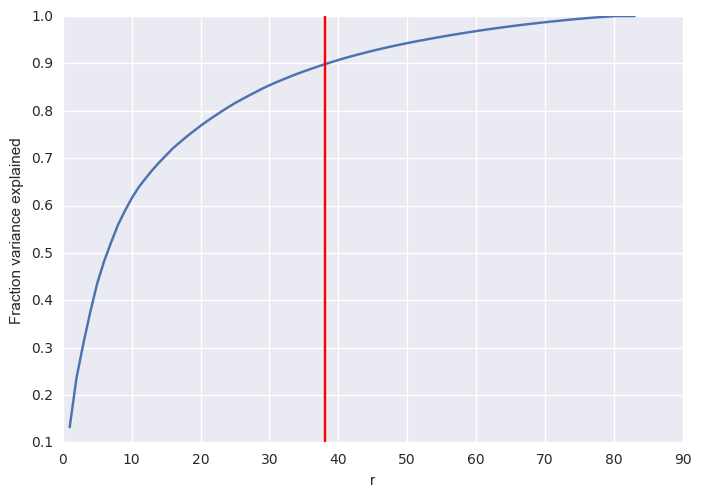

In [17]:
def ncomponents_fraction_explained(explained, fraction):
    """Returns the number of components to use to explain fraction of the variance in the dataset."""
    explained_cumulative = np.array([explained[0]])
    output = 0
    for i in range(1, explained.shape[0]):
        current = explained[i] + explained_cumulative[i-1]
        explained_cumulative = np.append(explained_cumulative,  current)
        if output == 0: 
            if current >= fraction:
                output = i
    
    plt.plot(range(1,84), explained_cumulative)
    plt.xlabel("r")
    plt.ylabel("Fraction variance explained")
    plt.axvline(output, c="r")
    
    print  "To explain " + str(fraction *100) +"% of the variance in the dataset, use " + str(output)+ " principal components."

ncomponents_fraction_explained(explained, 0.9)

In [18]:
# Easier way to to this: http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.decomposition.PCA.html
#genes_pca = PCA(n_components=0.9)
#genes_pca.fit(genes_df.values)

### 2(c)

In [19]:
genes_red = genes_pca.transform(genes)

In [20]:
genes_red = pd.DataFrame(genes_red)
genes_red["Type"] = cancer_types
genes_red.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,Type
0,-7.753438,-9.314296,3.253797,-9.320697,1.465929,-5.582007,0.741244,-0.532446,4.956494,-0.929143,...,2.089985,-2.121685,-2.022970,1.015563,-1.508247,-0.476039,0.009255,0.000084,1.443290e-14,2
1,-10.017611,-10.793248,0.529632,-11.889337,-2.442402,-5.513277,-0.827448,-1.833655,7.495782,-0.856314,...,0.645687,-1.363586,-0.129768,0.842404,-0.489376,-0.322634,-0.018034,0.000005,1.398881e-14,2
2,0.606929,-13.670501,3.698240,-12.260750,-1.459251,-5.953030,-0.025984,-1.607595,7.524298,-0.510631,...,-2.587385,2.522097,0.272623,-1.360970,0.812746,0.143821,0.043494,-0.000079,1.459943e-14,2
3,1.124330,-19.229971,-5.179124,-8.601581,16.053941,-3.593275,9.620420,8.131449,-3.814177,-11.940681,...,0.333334,-0.492769,0.015394,-0.183844,0.040487,-0.140243,-0.015217,-0.000012,1.221245e-14,2
4,0.452319,-17.140475,7.570632,-7.585414,-5.001080,-3.064151,0.529484,0.147103,-5.654977,4.799580,...,1.511957,-0.831616,0.906754,0.496926,-0.611324,-0.624233,-0.013494,0.000062,1.565414e-14,2


In [21]:
def plotPC_cancerType(PC1, PC2):
    for i in set(cancer_types):
        sub = genes_red[genes_red.Type == i]
        plt.plot(sub.iloc[:,PC1],
                sub.iloc[:,PC2],'.')
    plt.xlabel("PC"+str(PC1))
    plt.ylabel("PC"+str(PC2))


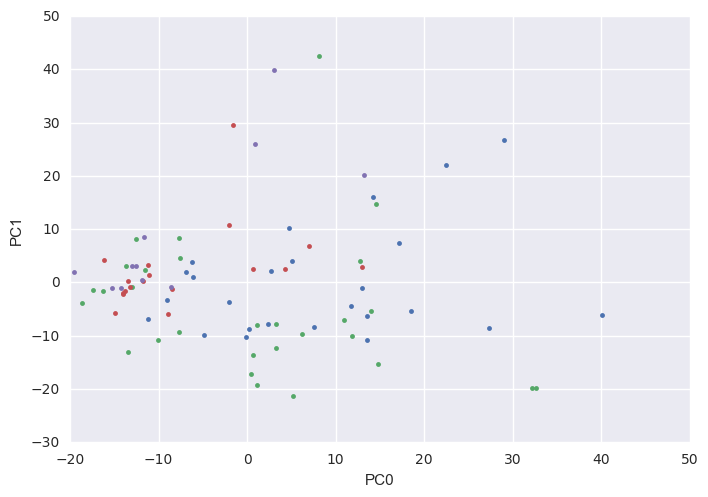

In [22]:
plotPC_cancerType(0, 1)

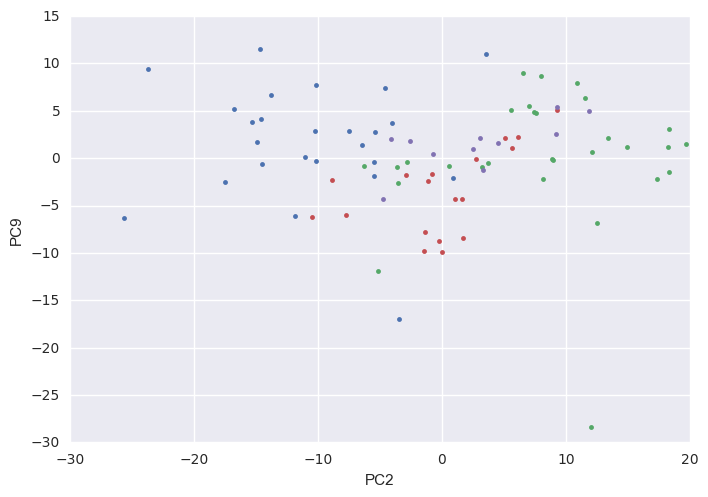

In [23]:
plotPC_cancerType(2, 9)

In [24]:
# There is no clear separation using these components. 
# This is to be expected since the first 2 components don't explain much of the variance.
print str(sum(explained[0:2])*100) + "%", str((explained[2] + explained[9])*100)+ "%"

23.6790276829% 9.96628947176%


### 3(a)

In [25]:
def test_train_id(N, test_frac):
    np.random.shuffle(N) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html
    delimiter = int(N.shape[0] * test_frac)
    test = N[:delimiter, :]
    train = N[delimiter:, :]
    
    return test, train

### 3(b)

In [26]:
test, train = test_train_id(genes, 0.2)
print test.shape, train.shape

(16, 2308) (67, 2308)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Prototyping code

# Need to shuffle the cancer types with each corresponding sample, so I'm adding it to the matrix
genes_df = pd.DataFrame(genes)
genes_df["Type"] = cancer_types
test, train = test_train_id(genes_df.values, 0.2)

In [28]:
train_pca = PCA(n_components = 10)

# For training I'm excluding the cancer type (last column with my code) to avoid it being used as a feature/measurement
train_red = train_pca.fit_transform(train[:,0:-1])
# We'll use the cancer type to classify
y_train = train[:,-1]

# Creating classifier and fitting training data
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(train_red, y_train)

# Does the the classifier predict the data in the training set correctly?
prediction_train = classifier.predict(train_red)
np.mean(prediction_train == y_train)

0.68656716417910446

In [29]:
# Let's cross-validate: how does it perform on the test set?
y_test = test[:,-1]
test_pca = PCA(n_components = 10)
test_red = test_pca.fit_transform(test[:,0:-1])
prediction_test = classifier.predict(test_red)
np.mean(prediction_test == y_test)

0.5625

In [30]:
# Now let's see how it performs on average and make this a function

def evaluate_KNeighbor_classifier(X, y, test_fract):
    X_df = pd.DataFrame(X)
    X_df["y"] = y
    result = np.array([])
    for i in range(100):
        test, train = test_train_id(X_df.values, test_fract)
        train_pca = PCA(n_components = 10)

        # For training I'm excluding the cancer type (last column with my code)
        train_red = train_pca.fit_transform(train[:,0:-1])
        # We'll use the cancer type to classify
        y_train = train[:,-1]

        # Creating classifier and fitting training data
        classifier = KNeighborsClassifier(n_neighbors=2)
        classifier.fit(train_red, y_train)

        # Let's cross-validate: how does it perform on the test set?
        y_test = test[:,-1]
        test_pca = PCA(n_components = 10)
        test_red = test_pca.fit_transform(test[:,0:-1])
        prediction_test = classifier.predict(test_red)

        result = np.append(result, np.mean(prediction_test == y_test))

    return "Performance: " + str(round(np.mean(result)*100,2))+" %"

In [31]:
evaluate_KNeighbor_classifier(genes, cancer_types, 0.2)

'Performance: 29.0 %'

### 4(a)

In [62]:
# I just need to change the code above slightly to do this
def cross_val_class_accuracy(model , X, y, r, test_fract , reps):
    X_df = pd.DataFrame(X)
    X_df["y"] = y
    cv_acc = np.array([])
    for i in range(reps):
        test, train = test_train_id(X_df.values, test_fract)
        train_pca = PCA(n_components = r)

        # For training I'm excluding the cancer type (last column with my code)
        train_red = train_pca.fit_transform(train[:,0:-1])
        # We'll use the cancer type to classify
        y_train = train[:,-1]

        # Creating classifier and fitting training data
        classifier = model
        classifier.fit(train_red, y_train)

        # Let's cross-validate: how does it perform on the test set?
        y_test = test[:,-1]
        test_pca = PCA(n_components = r)
        test_red = test_pca.fit_transform(test[:,0:-1])
        prediction_test = classifier.predict(test_red)

        cv_acc = np.append(cv_acc, np.mean(prediction_test == y_test))

    return np.mean(cv_acc) 

In [48]:
cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=2), genes, cancer_types, 10, 0.2, 100)

'Performance: 29.31 %'

I spent N hours working on this homework, collaborating in part with FRIENDONE AND FRIENDTWO.

ADD ANY COMMMENTS.

In [63]:
result = []
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# should use a dictionary to do this
# using r = 16: the test data only has 16 components if test_frac = 0.2
result.append(cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=2), genes, cancer_types, 16, 0.2, 200))
result.append(cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=10), genes, cancer_types, 16, 0.2, 200))
result.append(cross_val_class_accuracy(LinearDiscriminantAnalysis(), genes, cancer_types, 5, 0.2, 200))
result.append(cross_val_class_accuracy(LinearDiscriminantAnalysis(), genes, cancer_types, 16, 0.2, 200))
result.append(cross_val_class_accuracy(SVC(kernel='linear'), genes, cancer_types, 16, 0.2, 200))
result.append(cross_val_class_accuracy(DecisionTreeClassifier(), genes, cancer_types, 16, 0.2, 200))

(-0.25, 5.75)

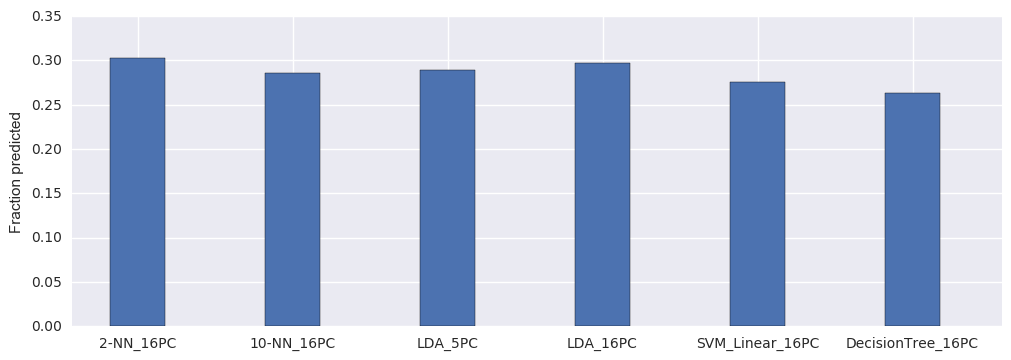

In [92]:
N = len(result_labels)
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(12,4))
ax.bar(ind, result, width)

result_labels = ["2-NN_16PC", "10-NN_16PC", "LDA_5PC", "LDA_16PC", "SVM_Linear_16PC", "DecisionTree_16PC" ]
ax.set_ylabel('Fraction predicted')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(result_labels)
plt.xlim(-0.25, 5.75)

# http://matplotlib.org/examples/api/barchart_demo.html


In [1]:
### To do
# - add STDEV to graph, need to change cross_val_class_accuracy() to output standard deviation of cv_accuracy

Informational: 2.5h by myself.